In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

py.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot

pd.options.plotting.backend = "plotly"

import seaborn as sns
import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"

<IPython.core.display.Javascript object>

In [4]:
path = Path(
    "/Users/gaurav.adlakha/Documents/attendance_s3_date/attendance_append_data.csv"
)

<IPython.core.display.Javascript object>

In [5]:
path_sample = Path("/Users/gaurav.adlakha/Downloads/attendance_daily_cumberland.csv")

<IPython.core.display.Javascript object>

In [6]:
df = pd.read_csv(path)

/var/folders/3l/l2zspl49257bfbwgmf7m29lr0000gq/T/ipykernel_11442/3280352130.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



<IPython.core.display.Javascript object>

In [7]:
len(df)

10455523

<IPython.core.display.Javascript object>

In [8]:
# df = pd.read_csv(path)
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2020,4703,Present,162339,"Ledesma-Chavez, Briston",260396,678625,-1,583752,...,28,0,272,False,False,False,False,False,False,1.601251e+09
1,1,2020,4680,Present,199137,"Zappala, Najee Shakyia",260361,711581,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
2,2,2020,4680,Present,161792,"Yusckat, Abbigale Ja'Niya",260361,678176,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
3,3,2020,4680,Present,219964,"Fetzer, Karalyn",260361,730963,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
4,4,2020,4680,Present,162963,"Donegan Sanchez, Lashaun",260361,679061,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455518,95381,2020,4700,Present,216478,"Medina Rodriguez, Vianna Makwaata",260383,727518,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455519,95382,2020,4700,Absent,175837,"Nassar, Myles",260383,690669,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455520,95383,2020,4700,Present,116126,"Conigland, Kasey Keori",260383,640193,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455521,95384,2020,4700,Present,113450,"Wyche, Tabitha Korbyn",260383,638371,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09


<IPython.core.display.Javascript object>

In [9]:
df.columns

Index(['Unnamed: 0', 'SCHOOLYEAR', 'SCHOOLDCID', 'PRESENCE_STATUS_CD',
       'STUDENTID', 'LASTFIRST', 'SCHOOLID', 'STUDENTDCID',
       'SECTIONENROLLMENTDCID', 'CALENDARDCID', 'PERIODDCID',
       'ATTENDANCECODEDCID', 'SCHEDULINGTERMYEARDCID', 'ATTENDANCEMODECODE',
       'TOTALMINUTESATTENDED', 'ATTENDANCECOMMENT',
       'ATTENDANCE_CODE_DESCRIPTION', 'ADAVALUECODE', 'ADAVALUETIME',
       'ADMVALUE', 'ATTENDANCEFLAGS', 'GRADELEVEL', 'SOURCESYSTEMID',
       'ATTENDANCEMODEFLAG', 'ATTENDANCEDATEYear', 'ATTENDANCEDATEMonth',
       'ATTENDANCEDATEWeek', 'ATTENDANCEDATEDay', 'ATTENDANCEDATEDayofweek',
       'ATTENDANCEDATEDayofyear', 'ATTENDANCEDATEIs_month_end',
       'ATTENDANCEDATEIs_month_start', 'ATTENDANCEDATEIs_quarter_end',
       'ATTENDANCEDATEIs_quarter_start', 'ATTENDANCEDATEIs_year_end',
       'ATTENDANCEDATEIs_year_start', 'ATTENDANCEDATEElapsed'],
      dtype='object')

<IPython.core.display.Javascript object>

In [10]:
df.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# student_id = 89271.0
# column_name = "ATTENDANCEDATEDay"
# fix_column = "PRESENCE_STATUS_CD"
# condtion = "Present"


def get_student_data(student_id, column_name, condtion="Present"):
    fix_column = "PRESENCE_STATUS_CD"
    column_to_fetch = [fix_column, column_name]
    df_student = df.loc[student_id][column_to_fetch]
    if condtion == "Present":
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] == "Present"]
    else:
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] != "Present"]
    return df_student.copy()

<IPython.core.display.Javascript object>

In [12]:
df_temp = get_student_data(89271.0, "ATTENDANCEDATEDay", "Present")
df_temp.groupby("ATTENDANCEDATEDay")["PRESENCE_STATUS_CD"].count().plot(kind="bar")

<IPython.core.display.Javascript object>

In [13]:
get_student_data(89271.0, "ATTENDANCEDATEDay", "Absent")


,PRESENCE_STATUS_CD,ATTENDANCEDATEDay
STUDENTID,,
89271,Absent,14
89271,Absent,3
89271,Absent,30
89271,Absent,4
89271,Absent,29
...,...,...
89271,Absent,7
89271,Absent,28
89271,Absent,3


<IPython.core.display.Javascript object>

In [14]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEYear"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEYear")["PRESENCE_STATUS_CD"].count().plot(kind="bar")

<IPython.core.display.Javascript object>

In [162]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEMonth"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEMonth")["PRESENCE_STATUS_CD"].count().plot(kind="bar")

<IPython.core.display.Javascript object>

In [163]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEWeek"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEWeek")["PRESENCE_STATUS_CD"].count().plot(kind="bar")

<IPython.core.display.Javascript object>

In [165]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEDayofweek"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEDayofweek")["PRESENCE_STATUS_CD"].count().plot(
    kind="bar"
)

<IPython.core.display.Javascript object>

In [166]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEDayofyear"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEDayofyear")["PRESENCE_STATUS_CD"].count().plot(
    kind="bar"
)

<IPython.core.display.Javascript object>

In [167]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEIs_month_end"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEIs_month_end")["PRESENCE_STATUS_CD"].count().plot(
    kind="bar"
)

<IPython.core.display.Javascript object>

In [168]:
df_temp = df.loc[89271.0][["PRESENCE_STATUS_CD", "ATTENDANCEDATEIs_month_start"]]

df_present = df_temp[df_temp["PRESENCE_STATUS_CD"] == "Present"]
df_present.groupby("ATTENDANCEDATEIs_month_start")["PRESENCE_STATUS_CD"].count().plot(
    kind="bar"
)

<IPython.core.display.Javascript object>

In [249]:
df.sample(10)

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,PERIODDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
STUDENTID,,,,,,,,,,,,,,,,,,,,,
82925,42486,2015,4277,Present,"Rodriguez-Mondragon, Brihanna Kaytlin",260321,82925,-1,391890,-1,...,24,2,55,False,False,False,False,False,False,1.456272e+09
194125,30361,2020,3,Present,"Pridgen, Khyla",260373,707222,-1,576172,-1,...,2,0,307,False,False,False,False,False,False,1.604275e+09
206873,50239,2020,4280,Present,"Kissinger, Kymbrell Jaiden",260397,718969,-1,582520,-1,...,29,4,29,False,False,False,False,False,False,1.611878e+09
110545,22346,2013,3841,Absent,"Capel, Pricilla Lujain",260302,110545,-1,188497,-1,...,18,4,108,False,False,False,False,False,False,1.397779e+09
172212,52065,2017,4700,Absent,"Farrell, Jamiyah",260383,687311,-1,442166,-1,...,16,1,16,False,False,False,False,False,False,1.516061e+09
199969,40449,2020,4707,Present,"Canopen, Marion Xion",260403,712319,-1,579560,-1,...,18,3,77,False,False,False,False,False,False,1.616026e+09
73844,81908,2013,4719,Absent,"Dore, Giovannie Jalon",260418,73844,-1,207468,-1,...,15,5,74,False,False,False,False,False,False,1.394842e+09
108073,41306,2016,4269,Present,"Timpac, Anyea Serenity",260338,108073,-1,423863,-1,...,23,0,23,False,False,False,False,False,False,1.485130e+09
105680,65809,2013,4711,Absent,"Dunlevy, Jameelah Charlie",260406,105680,-1,206442,-1,...,7,0,280,False,False,False,False,False,False,1.381104e+09


<IPython.core.display.Javascript object>

## What Next

In [16]:
df_student = df.loc[89271.0]

<IPython.core.display.Javascript object>

In [17]:
df_student.columns

Index(['Unnamed: 0', 'SCHOOLYEAR', 'SCHOOLDCID', 'PRESENCE_STATUS_CD',
       'LASTFIRST', 'SCHOOLID', 'STUDENTDCID', 'SECTIONENROLLMENTDCID',
       'CALENDARDCID', 'PERIODDCID', 'ATTENDANCECODEDCID',
       'SCHEDULINGTERMYEARDCID', 'ATTENDANCEMODECODE', 'TOTALMINUTESATTENDED',
       'ATTENDANCECOMMENT', 'ATTENDANCE_CODE_DESCRIPTION', 'ADAVALUECODE',
       'ADAVALUETIME', 'ADMVALUE', 'ATTENDANCEFLAGS', 'GRADELEVEL',
       'SOURCESYSTEMID', 'ATTENDANCEMODEFLAG', 'ATTENDANCEDATEYear',
       'ATTENDANCEDATEMonth', 'ATTENDANCEDATEWeek', 'ATTENDANCEDATEDay',
       'ATTENDANCEDATEDayofweek', 'ATTENDANCEDATEDayofyear',
       'ATTENDANCEDATEIs_month_end', 'ATTENDANCEDATEIs_month_start',
       'ATTENDANCEDATEIs_quarter_end', 'ATTENDANCEDATEIs_quarter_start',
       'ATTENDANCEDATEIs_year_end', 'ATTENDANCEDATEIs_year_start',
       'ATTENDANCEDATEElapsed'],
      dtype='object')

<IPython.core.display.Javascript object>

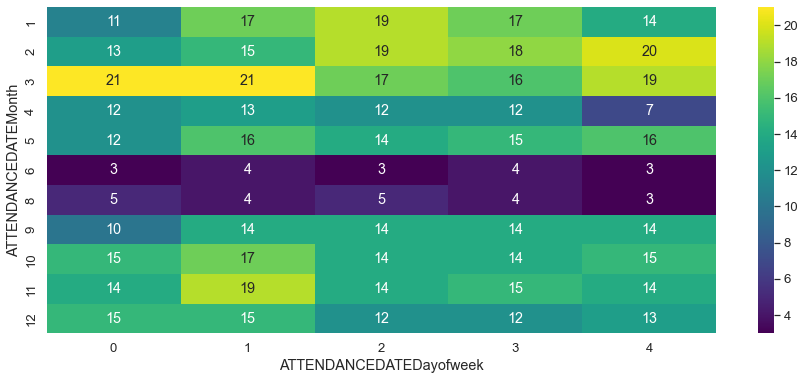

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

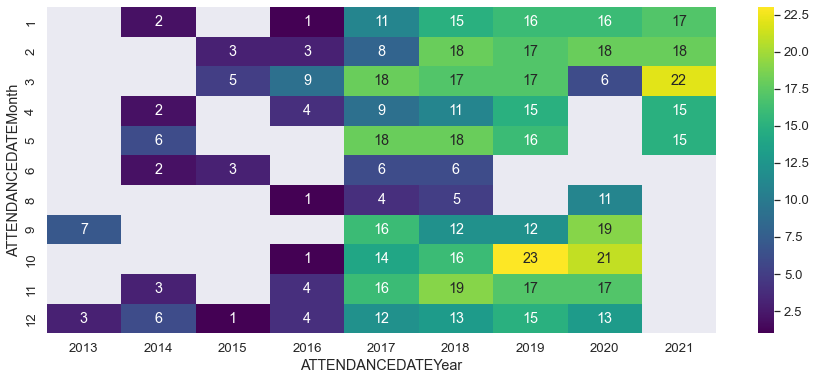

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEYear"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

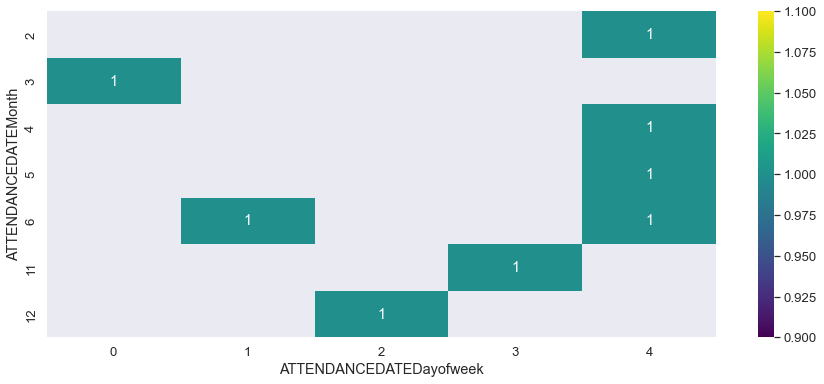

<IPython.core.display.Javascript object>

In [27]:
df_student = df.loc[105680]

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [ ]:
df_student = df.loc[121757]

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [ ]:

1
plt.figure(figsize=(15, 6))
2
sns.heatmap(
3
    (
4
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEYear"])[
5
            "PRESENCE_STATUS_CD"
6
        ].count()
7
    ).unstack(),
8
    annot=True,
9
    fmt="g",
10
    cmap=cm,
11
)
12
plt.show()

In [21]:
# plt.figure(figsize=(15, 6))
# sns.heatmap(
#     (
#         df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofyear"])[
#             "PRESENCE_STATUS_CD"
#         ].count()
#     ).unstack(),
#     annot=True,
#     fmt="g",
#     cmap=cm,
# )
# plt.show()

<IPython.core.display.Javascript object>

In [193]:
(df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
        "PRESENCE_STATUS_CD"
    ].count()).unstack()


ATTENDANCEDATEDayofweek,0,1,2,3,4
ATTENDANCEDATEMonth,,,,,
1,11,17,19,17,14
2,13,15,19,18,20
3,21,21,17,16,19
4,12,13,12,12,7
5,12,16,14,15,16
6,3,4,3,4,3
8,5,4,5,4,3
9,10,14,14,14,14
10,15,17,14,14,15


<IPython.core.display.Javascript object>

In [195]:
# (df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
#         "PRESENCE_STATUS_CD"
#     ].count())


<IPython.core.display.Javascript object>

In [254]:
df.sample(10)

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,PERIODDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
STUDENTID,,,,,,,,,,,,,,,,,,,,,
225290,76778,2020,3,Present,"Gonzalez-Rubio, Jiovanni Gage",260373,735870,-1,576348,-1,...,27,1,117,False,False,False,False,False,False,1.619482e+09
109382,25394,2015,4278,Present,"Glendening, Carrington Jaycob",260398,109382,-1,407511,-1,...,15,4,15,False,False,False,False,False,False,1.452816e+09
226465,78031,2020,4700,Present,"Krakover, Briona Milan",260383,736814,-1,569905,-1,...,26,2,239,False,False,False,False,False,False,1.598400e+09
107675,82314,2020,4767,Absent,"Alsaidi, Terence Kemon",260459,107675,-1,585160,-1,...,20,4,325,False,False,False,False,False,False,1.605830e+09
56872,98156,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212212,-1,...,27,4,270,False,False,False,False,False,False,1.380240e+09
234618,62461,2020,4692,Present,"Cowfer, Bralyn Anaisa",260369,743902,-1,563868,-1,...,4,4,248,False,False,False,False,False,False,1.599178e+09
94573,18484,2020,4686,Present,"Smoker, Annaliz Amarien",260368,94573,-1,568551,-1,...,4,4,248,False,False,False,False,False,False,1.599178e+09
204706,25865,2020,4707,Present,"Pichardo, Theodore",260403,716805,-1,579375,-1,...,14,0,258,False,False,False,False,False,False,1.600042e+09
192296,47219,2020,4271,Present,"Cascasan, Chastity Khamir",260354,705738,-1,562314,-1,...,18,3,49,False,False,False,False,False,False,1.613606e+09


<IPython.core.display.Javascript object>

In [15]:
get_student_data(56872, "ATTENDANCEDATEDayofweek")

,PRESENCE_STATUS_CD,ATTENDANCEDATEDayofweek
STUDENTID,,
56872,Present,3
56872,Present,1
56872,Present,3


<IPython.core.display.Javascript object>

In [256]:
df.loc[56872]

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,PERIODDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
STUDENTID,,,,,,,,,,,,,,,,,,,,,
56872,45600,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212197,-1,...,12,3,255,False,False,False,False,False,False,1.378944e+09
56872,52081,2013,4720,Present,"Yu, Cortez Jelicia",260424,56872,-1,212183,-1,...,29,3,241,False,False,False,False,False,False,1.377734e+09
56872,52082,2013,4720,Present,"Yu, Cortez Jelicia",260424,56872,-1,212188,-1,...,3,1,246,False,False,False,False,False,False,1.378166e+09
56872,74649,2013,4720,Present,"Yu, Cortez Jelicia",260424,56872,-1,212204,-1,...,19,3,262,False,False,False,False,False,False,1.379549e+09
56872,93153,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212253,-1,...,7,3,311,False,False,False,False,False,False,1.383782e+09
56872,12992,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212293,-1,...,17,1,351,False,False,False,False,False,False,1.387238e+09
56872,12993,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212294,-1,...,18,2,352,False,False,False,False,False,False,1.387325e+09
56872,16402,2013,4720,Absent,"Yu, Cortez Jelicia",260424,56872,-1,212292,-1,...,16,0,350,False,False,False,False,False,False,1.387152e+09


<IPython.core.display.Javascript object>

In [ ]:
#grade 


In [29]:
list(df.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'SCHOOLDCID',
 'PRESENCE_STATUS_CD',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'GRADELEVEL',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEYear',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

In [30]:
df.sample(10)["GRADELEVEL"]

STUDENTID
163702    8
84008     8
137382    5
237741    0
213016    1
99541     8
123712    7
227880    6
231855    7
163408    4
Name: GRADELEVEL, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df_grade_8 = df[df["GRADELEVEL"] == 8]

<IPython.core.display.Javascript object>

In [36]:
df_grade_8

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,PERIODDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
STUDENTID,,,,,,,,,,,,,,,,,,,,,
105962,77,2020,4699,Present,"Herring, Holley Heath",260358,105962,-1,566505,-1,...,28,0,272,False,False,False,False,False,False,1.601251e+09
104923,78,2020,4699,Present,"Mackie, Lamonte Chris",260358,104923,-1,566505,-1,...,28,0,272,False,False,False,False,False,False,1.601251e+09
164790,79,2020,4699,Present,"Cusick, Zachary Monasia",260358,680528,-1,566505,-1,...,28,0,272,False,False,False,False,False,False,1.601251e+09
141680,80,2020,4699,Present,"Sabylin, Aleyah Teneshia",260358,661105,-1,566505,-1,...,28,0,272,False,False,False,False,False,False,1.601251e+09
101137,81,2020,4699,Present,"Leftwich, Jonah Jaida",260358,101137,-1,566505,-1,...,28,0,272,False,False,False,False,False,False,1.601251e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123073,95347,2020,4708,Present,"Versoza, Daevion Macey",260417,645112,-1,585855,-1,...,20,3,233,False,False,False,False,False,False,1.597882e+09
102054,95348,2020,4708,Present,"Glasper, Jasmin Te'Ara",260417,102054,-1,585855,-1,...,20,3,233,False,False,False,False,False,False,1.597882e+09
95819,95349,2020,4708,Present,"Mayberry, Azalea Syler",260417,95819,-1,585855,-1,...,20,3,233,False,False,False,False,False,False,1.597882e+09


<IPython.core.display.Javascript object>

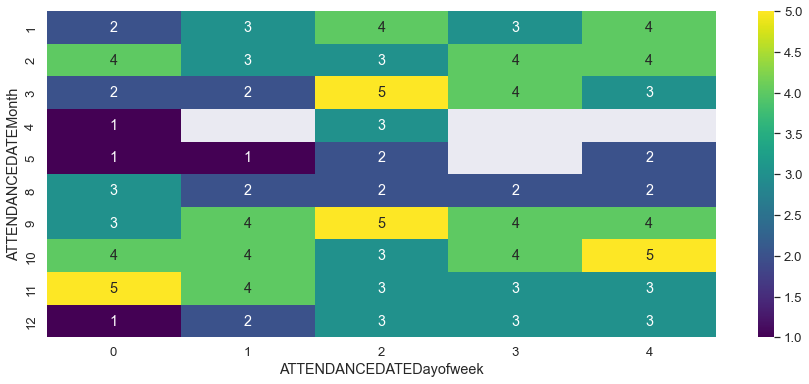

<IPython.core.display.Javascript object>

In [37]:
df_student = df_grade_8.loc[105962]

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

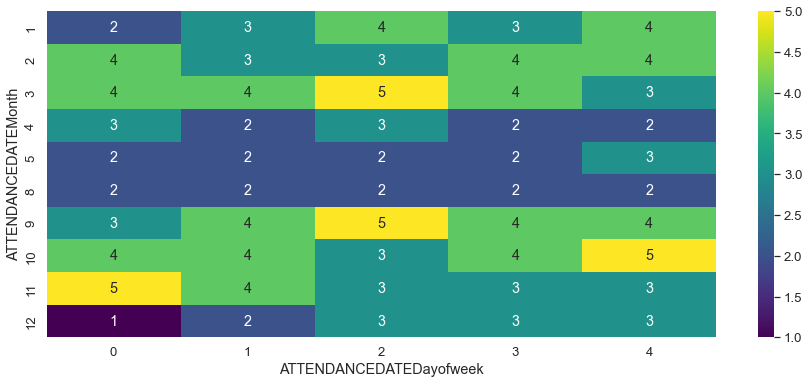

<IPython.core.display.Javascript object>

In [38]:
df_student = df_grade_8.loc[104923]

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

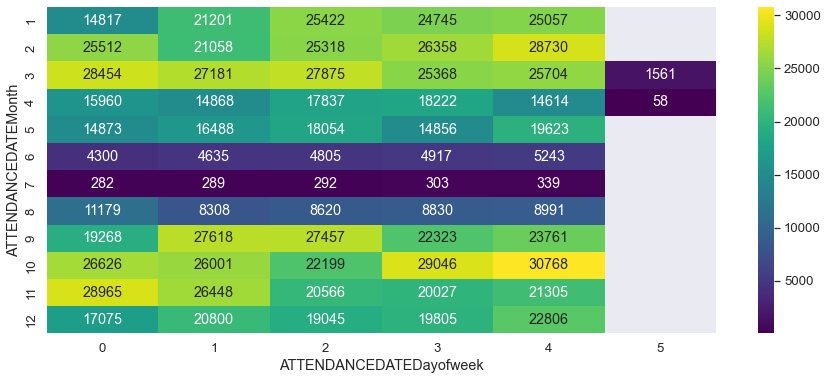

<IPython.core.display.Javascript object>

In [39]:
df_student = df_grade_8

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()